<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe10_KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del Problema

El Problema de la Mochila es un problema clásico de optimización combinatoria.
La optimización es fundamental para cualquier problema relacionado con la toma de decisiones. La tarea de tomar decisiones implica elegir entre varias alternativas y escoger precisamente la "mejor" decisión posible dependiendo del problema. En este caso, estaremos trabajando con el problema llamado "Problema de la Mochila" que busca maximizar una ganacia.

**Entrada**: *Conjunto de variables independientes $[a_1,a_2,...,a_n]$*

**Salida**: *Valor óptimo dependiendo de la función*

Un problema de optimización comienza con un conjunto de variables independientes o parámetros, que pueden incluir restricciones que definen los valores aceptables de estas variables. La solución al problema va a estar dada por un conjunto de valores permitidos para las variables independientes en los que la función objetivo asume un valor óptimo. En términos matemáticos, la optimización implica normalmente maximizar o minimizar la función objetivo.

#2. Problema de la Mochila 

El Problema de la Mochila (conocido también como Knapsack Problem) es un problema clásico de la Investigación de Operaciones y en particular de la Programación Entera. En simples palabras, el problema consiste en que se tiene una mochila, la cual tiene una capacidad limitada, y se tienen una serie de elementos los cuales tienen un peso y un valor. Luego el problema consiste en seleccionar un subconjunto de dichos objetos de forma tal que se maximice la ganancia que se obtiene, pero sin sobrepasar la capacidad límite de la mochila.

A continuación se muestra un ejemplo del problema clásico de la mochila:

<a href="https://imgur.com/lKhXKt0"><img src="https://imgur.com/lKhXKt0.png" title="source: imgur.com" /></a>

En este ejemplo tenemos una mochila con una capacidad de $15kg$ y los siguientes objetos con un valor y un peso:

1. $4 y 12kg

2. $2 y 1kg

3. $2 y 2kg 

4. $1 y 1kg

5. $10 y 4kg

Y aquí es donde entra el problema, ¿Qué elementos debemos guardar en la mochila para obtener la mayor ganacia sin sobrepasarnos el peso límite de la mochila?, para esto, en este informe se implementaran 2 métodos para resolver este problema: 

* Método bottom-up (Programación avanzada)

* Método greedy




##2.1 Descripción del algoritmo bottom-up

Para resolver este problema utilizando un algoritmo que aplica programación dinámica, haremos uso de una matriz auxiliar que tendrá las siguientes propiedades: 

<a href="https://imgur.com/H8Kj5KB"><img src="https://imgur.com/H8Kj5KB.png" title="source: imgur.com" /></a>

* definimos la siguiente **sub-estructura óptima**:

<a href="https://imgur.com/OtszXrG"><img src="https://imgur.com/OtszXrG.png" title="source: imgur.com" /></a>

donde:

* `m` = matriz  

* `p` = precio

* `p[i]`  = precio del objeto actual  

* `v[i]` = valor del objeto actual

Por lo que para el funcionamiento de este algoritmo, y analizando su sub-estructura óptima, se divide en los 3 siguientes casos: 

1. En primer caso, si nos encontramos en la fila 0 o columna 0 de la matriz, asignaremos un 0.

2. En un segundo caso, si el peso del objeto supera al peso hasta el momento (`p[i] > p`), asignaremos el peso del objeto anterior

3. Como tercer y último caso, es cuando el peso del objeto es igual o menor al peso actual (`p[i] =< p`), aquí el valor que asignaremos será el máximo entre 2 opciones: 

 * El valor máximo anterior (Sin aumentar el valor del objeto actual) 

 * El valor del objeto anterior y peso menos el peso del objeto actual, todo esto más el valor del objeto actual.

Así, en cada iteración nos iremos quedando con el valor máximo hasta el momento, por lo que al llenar la tabla, se retorna el `m[cantidad de elementos, peso máximo]` (que nos indica la última posición de la tabla)



##2.2 Descripción del algoritmo greedy

Lo que realiza el algoritmo greedy para este problema es lo siguiente: 

1. Calcula una proporción precio/peso para cada objeto y los agrega en una lista. Por lo que ya no vamos a trabajar con una matriz, si no que con la proporción por objeto.

2. Ordena dicha lista de mayor a menor, por lo que al inicio nos quedaran los objetos que supuestamente deben ser los más óptimos en precio/peso.

3. Se recorre la lista agregando los elementos a la mochila hasta que se supere el peso límite.

Este algoritmo no siempre nos entrega el resultado más óptimo para este problema, por lo que no es el más recomendado pese a su bajo tiempo de ejecución, problema que se mostrará más adelante en el informe.




##2.3 Código

##Bottom-up



In [ ]:
def knapSackBottom(W, wt, val, n, verbose):
    # Matriz de auxiliar de 0
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]

    cant = 0

    if verbose == True: 
      print("Matriz inicial:")
      for j in K:
        print(j)
      print("\n")

    for i in range(n + 1):
        if verbose == True: print("Indice número: ",i,end="\n\n")
        for w in range(W + 1):
            if verbose == True: print("Peso número: ",w,end="\n\n")
            # Caso 1
            if i == 0 or w == 0:
                K[i][w] = 0
                if verbose == True:
                  print("Entrando al primer caso: ")
                  for j in K:
                    print(j)
                  print("\n")
            # Caso 2 
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
                
                if verbose == True: 
                  print("Entrando al segundo caso: ")
                  for j in K:
                    print(j)
                  print("\n")
                
            # Caso 3
            else:
                K[i][w] = K[i-1][w]
                if verbose == True: 
                  print("Entrando al tercer caso: ")
                  for j in K:
                    print(j)
                  print("\n")
            cant+=1

    return K[n][W],cant

# Driver code
val = [60, 100, 120]
wt = [1, 2, 3]
W = 5
n = len(val)
print("Lista de precios y sus pesos: ")
for i in range(3):
  print("$",val[i],"y",wt[i],"kg")
print("Con una capacidad máxima de",W,"kg\n")

val_max , cantsubproblemas = knapSackBottom(W, wt, val, n, False)

print("Máxima ganacia alcanzada:",val_max,"con",cantsubproblemas,"subproblemas a resolver")

Lista de precios y sus pesos: 
$ 60 y 1 kg
$ 100 y 2 kg
$ 120 y 3 kg
Con una capacidad máxima de 5 kg

Máxima ganacia alcanzada: 220 con 24 subproblemas a resolver


## Greedy

In [ ]:
import operator
def fractionalKnapsack(W, wt, val, n, verbose):
    
    arr = {}
    cont = 0
    
    # Obtenemos el porcentaje precio/peso para cada elemento y lo guardamos en un arreglo auxiliar
    for i in range(n):
      num = val[i] / wt[i]
      arr[i] = num
      cont+=1 

    # Ordenamos el arreglo de mayor a menor
    arr = sorted(arr.items(), key = operator.itemgetter(1), reverse=True)   

    max_value = 0
    for item in enumerate(arr):
        cont+=1
        if wt[item[1][0]] <= W:
          max_value += val[item[1][0]]
          W -= wt[item[1][0]]

    return max_value, cont
 

val = [60, 100, 120]
wt = [1, 2, 3]
W = 5
n = len(val)
print("Lista de precios y sus pesos: ")
for i in range(3):
  print("$",val[i],"y",wt[i],"kg")
print("Con una capacidad máxima de",W,"kg\n")

val_max1,cantsubproblemas1 = fractionalKnapsack(W, wt, val, n, False)

print("Máxima ganacia alcanzada:",val_max1,"con",cantsubproblemas1,"subproblemas a resolver")

Lista de precios y sus pesos: 
$ 60 y 1 kg
$ 100 y 2 kg
$ 120 y 3 kg
Con una capacidad máxima de 5 kg

Máxima ganacia alcanzada: 160 con 6 subproblemas a resolver


##2.4. Ejecución del algoritmo paso a paso con verbose = True

In [ ]:
val = [60, 100, 120]
wt = [1, 2, 3]
W = 5
n = len(val)
print("Lista de precios y sus pesos: ")
for i in range(3):
  print("$",val[i],"y",wt[i],"kg")
print("Con una capacidad máxima de",W,"kg\n")
max_val, cant = knapSackBottom(W, wt, val, n, True)
print("Máxima ganacia alcanzada:",max_val,"con",cant,"subproblemas a resolver")

Lista de precios y sus pesos: 
$ 60 y 1 kg
$ 100 y 2 kg
$ 120 y 3 kg
Con una capacidad máxima de 5 kg

Matriz inicial:
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Indice número:  0

Peso número:  0

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Peso número:  1

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Peso número:  2

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Peso número:  3

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Peso número:  4

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Peso número:  5

Entrando al primer caso: 
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


Indice número:  1

Peso número:  0

Entrando al primer cas

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución método bottom-up).**

*El algoritmo dinámico para el **Problema de la mochila** tiene un **tiempo de ejecución de** $O(n*w)$ siendo "n" la cantidad de elementos y "w" la variable peso.*

## Prueba del teorema

Para probar el teorema, podemos hacerlo viendo lo que realiza el algoritmo:

<a href="https://imgur.com/KcOMfZV"><img src="https://imgur.com/KcOMfZV.png" title="source: imgur.com" /></a>

En donde vemos dos ciclos anidados, el primero que va desde 0 hasta n

* Que nos da una complejidad de $O(n)$

Y el segundo ciclo for que va desde 0 hasta w

* Que nos da una complejidad de $O(w)$

Y dentro de cada ciclo tenemos acciones de complejidad constante, por lo que finalmente nos queda que el tiempo de ejecución del algoritmo es: $O(n*w)$


### **Teorema (Tiempo de ejecución método greedy).**

*El algoritmo dinámico para el **Problema de la mochila** tiene un **tiempo de ejecución de** $O(n*log(n))$* 

## Prueba del teorema

De la misma forma que el el teorema anterior, podemos obtener su tiempo de ejecución luego de ver su código, donde tenemos lo siguiente:

<a href="https://imgur.com/Hc0Mpwx"><img src="https://imgur.com/Hc0Mpwx.png" title="source: imgur.com" /></a>

En donde tenemos los siguientes procedimientos, el primero, al momento de ordenar los elementos:

* Que nos da una complejidad de $O(nlog(n))$

Y el segundo ciclo, que es utilizado para buscal la solución óptima, va desde 0 hasta n

* Que nos da una complejidad de $O(n)$

Y dentro de cada ciclo tenemos acciones de complejidad constante, por lo que finalmente nos queda que el tiempo de ejecución del algoritmo es: $O(nlog(n))$





# 4. Correctitud 

### **Teorema**

*El algoritmo dinámico que resuelve **Problema de la mochila** para entradas de tamaño n y para una capacidad P retorna el beneficio máximo para un subproblema óptimo encontrado.*

## Prueba del Teorema (Programación dinámica) 

Para probar el teorema lo haremos de las siguientes maneras:

**1.-) Analizando que ocurre con su subestructura óptima:**

<a href="https://imgur.com/OtszXrG"><img src="https://imgur.com/OtszXrG.png" title="source: imgur.com" /></a>

* En el caso 2, nos aseguramos que el peso en cuestión no sobrepase el peso permitido por la mochila

* En el caso 3, nos aseguramos de constantemente ir guardando el precio máximo hasta el momento

Por lo que con estás dos restricciones, podemos comprobar que el algoritmo es correcto para todo caso.


**2.-) Mediante la inducción matemática:**

**Caso Base (n = 1):**

Se considera el primer elemento (i = 1) como solucion optima (única hasta el momento).

**Paso inductivo (n != 1):**

La solución optima se basa en la resolución de los subproblemas anteriores y la formula de la subestructura óptima. Lo que nos asegura su correcto funcionamiento.

## Prueba del Teorema (greedy) 

Por otro lado, tenemos la correctitud del **algoritmo greedy**:

Analizando su modo de operación, el algoritmo agrega a la ganancia los objetos que tengan mejor proporcion (precio/peso). Sin embargo, el principal problema de este algoritmo, es que si se topa con un objeto cuyo peso supera la capacidad, éste dejara de operar, por lo que puede haberse saltado objetos que aun podian ser agregados pese a no ser los más óptimos en precio/peso.

Es por esto, que podemos concluir que el algoritmo greedy para el problema de la mochila no es correcto.




# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación de tiempo de ejecución entre:

* Método Bottom-up

* Método Greedy

Para problemas desde 5 hasta 50 elementos.

In [ ]:
#Generador de Instancias
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

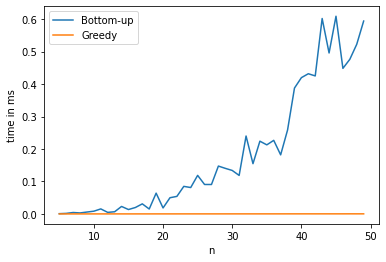

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]
verbose = False
for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  n = len(val)
  t1 = repeat(setup="from __main__ import knapSackBottom", stmt=f"knapSackBottom({W}, {wt}, {val}, {n}, {verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import fractionalKnapsack", stmt=f"fractionalKnapsack({W}, {wt}, {val}, {n}, {verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottom-up","Greedy"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Análisis

Con respecto al gráfico, podemos la gran diferencia entre ambos algoritmos y asi confirmar su tiempo de ejecución esperado, que por un lado, tenemos al algoritmo utilizando programación dinámica el cual mantiene un tiempo de O(n*w), que nos da la función exponencial vista en azul. Mientras que por otro lado tenemos el algoritmo greedy, que su tiempo de ejecución es de O(nlog(n)), timepo que podemos confirmar en la gráfica. Pese a tener un tiempo menor, debemos recordar que el algoritmo greedy no siempre da el resultado más óptimo posible, si no que en algunos casos da valores menores al real, por lo que pese a tener un tiempo sumamente menor, si queremos obtener el resultado más óptimo posible lo podemos encontrar mediante el algoritmo bottom-up.

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación de subproblemas resueltos:

* Método Bottom-up

* Método Greedy

Para problemas desde 5 hasta 100 elementos.

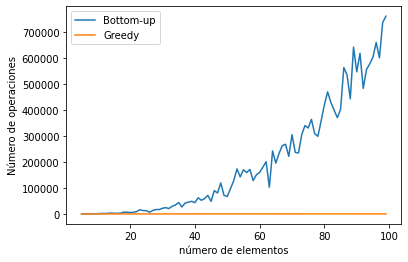

In [ ]:
x=[n for n in range(5,100)]
y1=[]
y=[] 

for n in range(5,100):
  W, val, wt = knapsack_instance_generator(n)
  n = len(val)

  val_maxBottom,cantsubproblemasBottom = knapSackBottom(W, wt, val, n, False)
  val_maxGreedy,cantsubproblemasGreedy = fractionalKnapsack(W, wt, val, n, False)

  y1.append(cantsubproblemasBottom)
  y.append(cantsubproblemasGreedy)

plt.plot(x,y1)
plt.plot(x,y)
plt.legend(["Bottom-up","Greedy"])

plt.xlabel('número de elementos')
plt.ylabel('Número de operaciones')
plt.show()

##Análisis

Luego de ver el gráfico, vemos que la cantidad de subproblemas a resolver por el algoritmo que aplica programación avanzada es exponencialmente mayor al método greedy. Esto se puede dar debido a que, en el algoritmo bottom-up, se tiene que resolver cada casilla de la matriz auxiliar a utilizar, por lo que si se tienen pesos muy altos, la matriz crece exponencialmente, lo que conlleva a que tenga muchos más subproblemas a resolver, siendo este número dado por n*p problemas a resolver. Por otro lado, el algoritmo greedy obtiene la proporcion de cada objeto y luego trabaja con este mismo valor, por lo que simplifica en gran medida los subproblemas a resolver. 